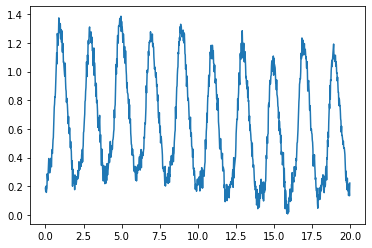

In [281]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize

pi=np.pi
Nx=1000
T1=50
x1=np.arange(Nx)/T1
y=np.sin(x1*pi/2)**2+0.2*abs(np.cos(x1*pi+0.2))+0.1*np.sin(x1*pi/10)+np.tanh(0.05*np.sin(x1*pi/2))+0.05*np.sin(x1*pi*3)
y=y+np.random.normal(0,0.04,Nx)
plt.plot(x1,y)

In [282]:
def func_lag(x1,lag):
    Nx=len(x1)
    x1L=np.zeros(Nx)
    for i in range(lag,Nx):
        x1L[i]=x1[i-lag]
    return x1L

2.041961491387011


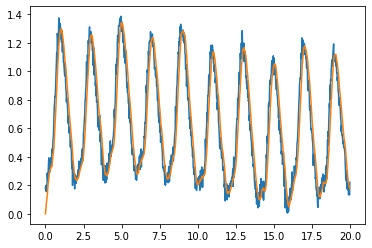

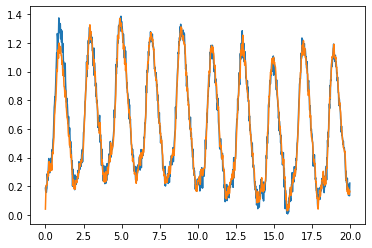

In [283]:
def func_MA1(y,k=5):
    temp=0
    w=np.zeros(k-1)
    for i in range(1,k):
        w[i-1]=1
        w[i-1]=1/i
        a=0.05
        w[i-1]=np.power(1-a,i-1) #exponential smoothing
        temp+=w[i-1]*func_lag(y,i)
    return temp/np.sum(w)

y1=func_MA1(y,10)

plt.figure()
plt.plot(x1,y)
plt.plot(x1,y1)





def func_AR1(b,y):
    yy=np.zeros(len(y))
    yy+=b[0]
    vec=[1,2,5,10,50,100]
    for i in range(len(vec)):
        yy+=b[i+1]*func_lag(y,vec[i])
    return yy

Nv=7

func_AR1_anonym = lambda b : func_AR1(b,y)

def func_mse(b,y):
    yhat=func_AR1_anonym(b)
    yy=y[100:None]
    yyhat=yhat[100:None]
    return 0.5*np.mean((yy-yyhat)**2)

func_mse_anonym = lambda b : func_mse(b,y)



b=np.random.rand(Nv)
mse=func_mse_anonym(b)
print(mse)

b=scipy.optimize.minimize(func_mse_anonym,b).x

y2=func_AR1_anonym(b)

plt.figure()
plt.plot(x1,y)
plt.plot(x1,y2)


In [284]:
#differencing

ydiff1=np.zeros(Nx)


for i in range(1,Nx):
    ydiff1[i]=y[i]-y[i-1]


In [285]:
np.c_[y,func_lag(y,1),ydiff1]

array([[ 0.18609142,  0.        ,  0.        ],
       [ 0.16419157,  0.18609142, -0.02189985],
       [ 0.2001005 ,  0.16419157,  0.03590893],
       ...,
       [ 0.17069845,  0.17905593, -0.00835747],
       [ 0.1328854 ,  0.17069845, -0.03781305],
       [ 0.22139579,  0.1328854 ,  0.08851039]])

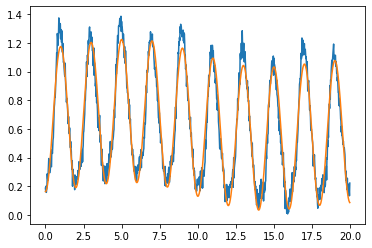

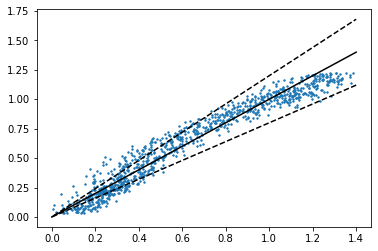

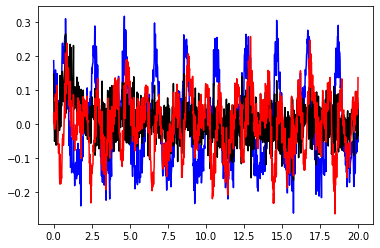

In [289]:
def func_test(b,x1):
    y= 0.3+np.sin(x1*pi/2)**2
    y+=b[0]+b[1]*np.sin(b[2]+b[3]*x1)
    y+=b[4]*np.sin(b[5]+b[6]*x1)
    y+=b[7]*x1+b[8]*x1**2
    return y

func_test_anonym = lambda b : func_test(b,x1)

Nv=9
b=np.random.rand(Nv)

def func_mse(b,y):
    yhat=func_test_anonym(b)
    return 0.5*np.mean((y-yhat)**2)

func_mse_anonym = lambda b : func_mse(b,y)

b=scipy.optimize.minimize(func_mse_anonym,b).x
y3=func_test_anonym(b)

plt.figure()
plt.plot(x1,y)
plt.plot(x1,y3)

a=1.4

plt.figure()
plt.scatter(y,y3,s=2)
plt.plot([0,a],[0,a],'k')
plt.plot([a,0,a],[0.8*a,0,1.2*a],'k--')

plt.figure()
plt.plot(x1,y-y1,'b')
plt.plot(x1,y-y2,'k')
plt.plot(x1,y-y3,'r')